In [2]:
import pandas as pd
df=pd.read_csv("lab4_data.csv")
print(df)

     age   income student credit_rating buys_computer
0    <=30    high      no          fair            no
1    <=30    high      no     excellent            no
2   31…40    high      no          fair           yes
3     >40  medium      no          fair           yes
4     >40     low     yes          fair           yes
5     >40     low     yes     excellent            no
6   31…40     low     yes     excellent           yes
7    <=30  medium      no          fair            no
8    <=30     low     yes          fair           yes
9     >40  medium     yes          fair           yes
10   <=30  medium     yes     excellent           yes
11  31…40  medium      no     excellent           yes
12  31…40    high     yes          fair           yes
13    >40  medium      no     excellent            no


In [3]:
#A1
prior_probabilities = df['buys_computer'].value_counts(normalize=True)


print("Prior Probability for each class:")
print(prior_probabilities)

Prior Probability for each class:
yes    0.642857
no     0.357143
Name: buys_computer, dtype: float64


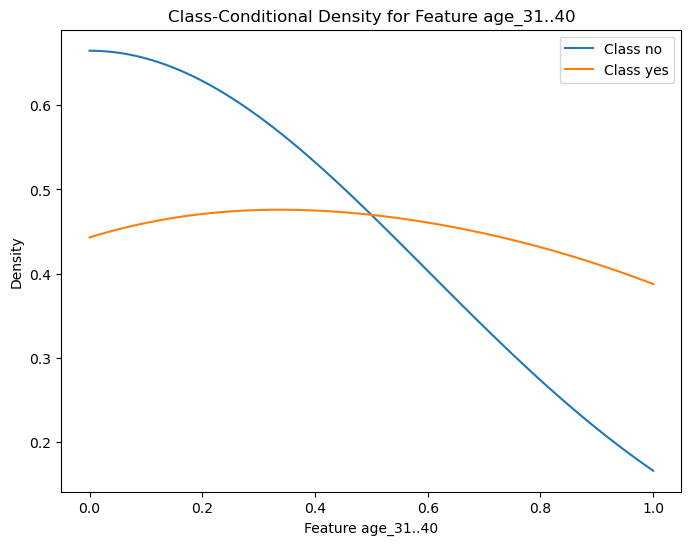

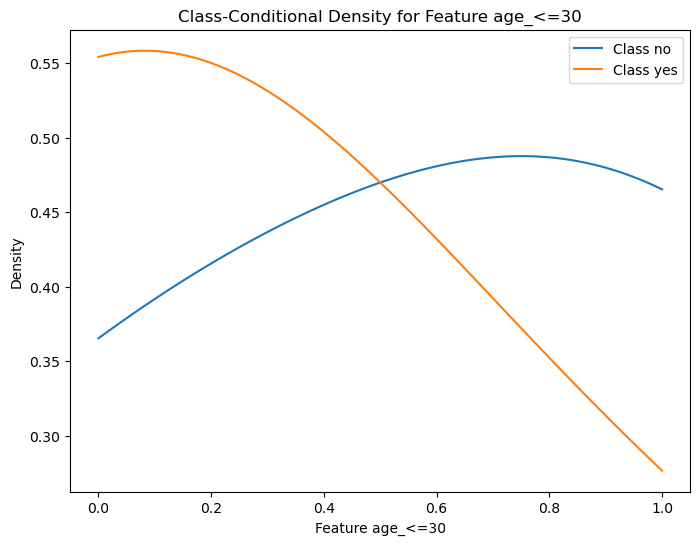

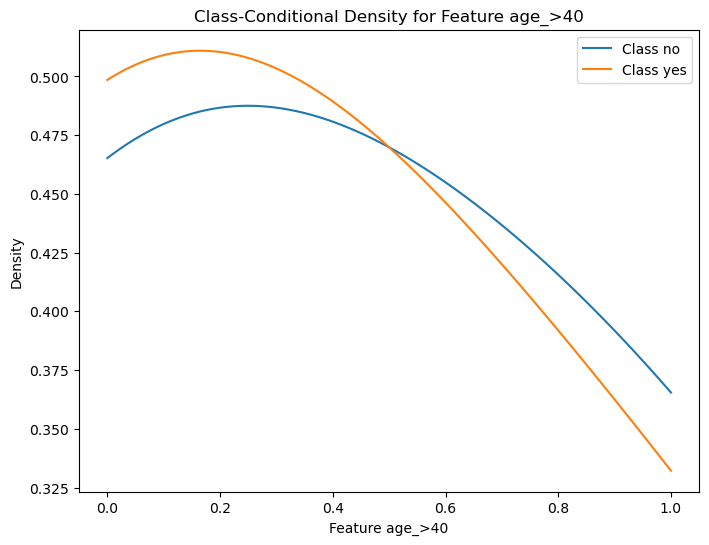

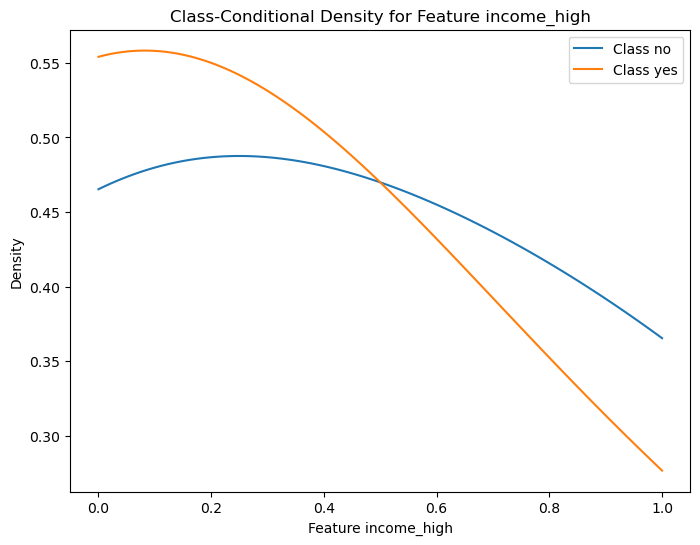

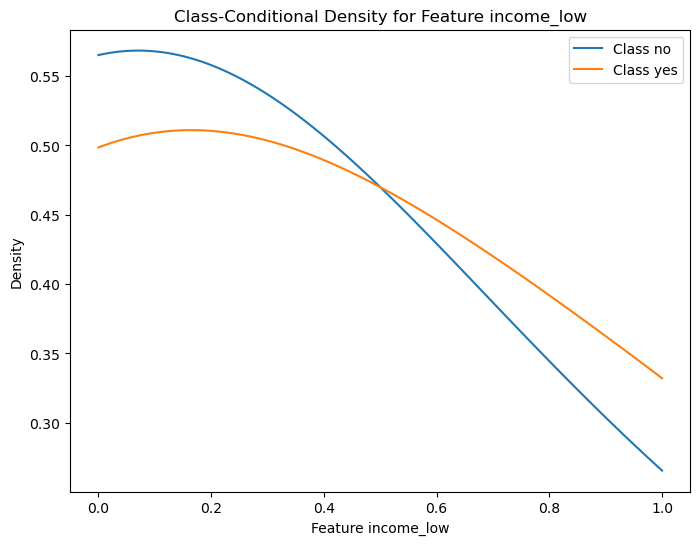

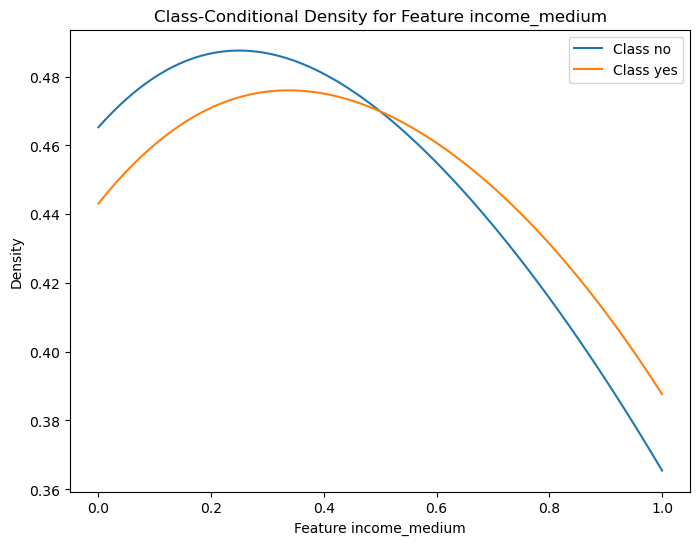

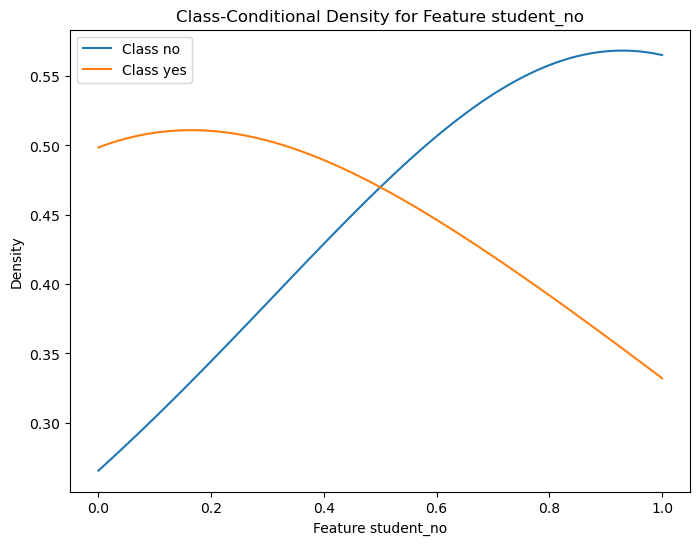

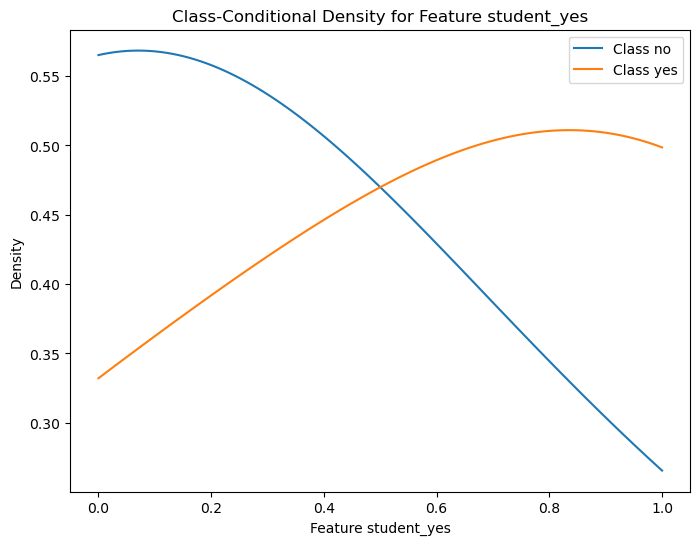

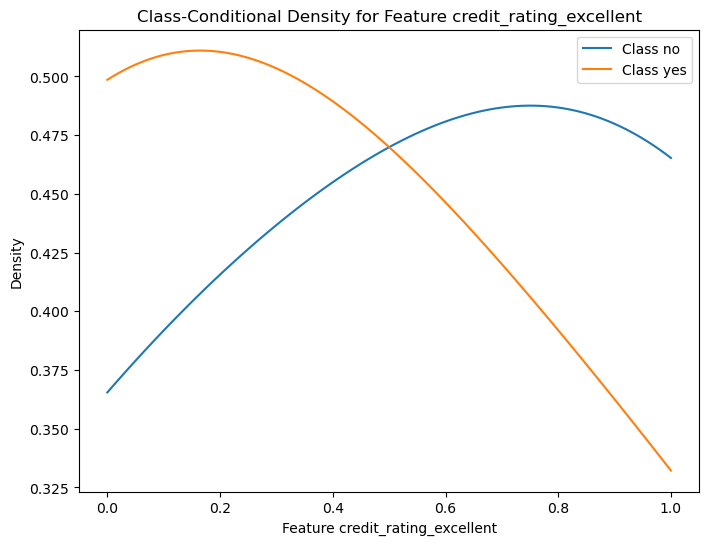

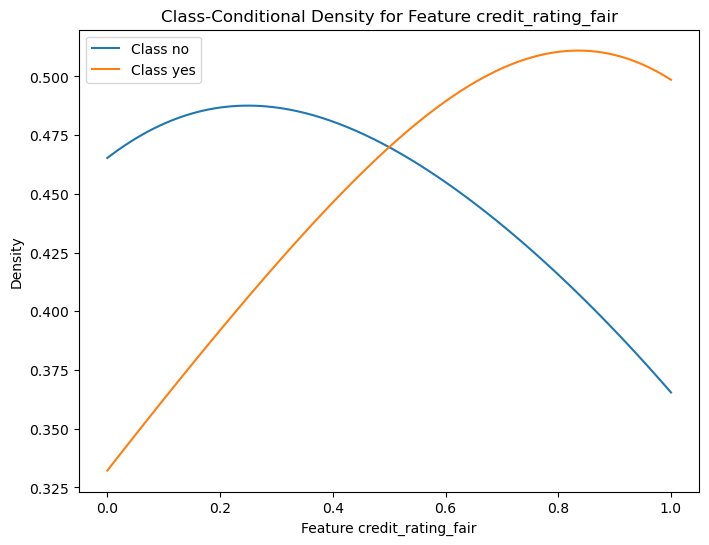

In [7]:
#A2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity

# Create a DataFrame with the provided data
data = {
    'age': ['<=30', '<=30', '31..40', '>40', '>40', '>40', '31..40', '<=30', '<=30', '>40', '<=30', '31..40', '31..40', '>40'],
    'income': ['high', 'high', 'high', 'medium', 'low', 'low', 'low', 'medium', 'low', 'medium', 'medium', 'medium', 'high', 'medium'],
    'student': ['no', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no'],
    'credit_rating': ['fair', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'excellent'],
    'buys_computer': ['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'no']
}

df = pd.DataFrame(data)

# Extract features and target variable
features = df.drop('buys_computer', axis=1)
target = df['buys_computer']

# Convert categorical features to numerical using one-hot encoding
features_encoded = pd.get_dummies(features)

# Set up the range of values for each feature
feature_ranges = [np.linspace(features_encoded[feature].min(), features_encoded[feature].max(), 100) for feature in features_encoded.columns]

# Calculate and plot class-conditional densities for each feature
for i, feature in enumerate(features_encoded.columns):
    plt.figure(figsize=(8, 6))
    for class_label in np.unique(target):
        # Filter data for the current class
        X_class = features_encoded[target == class_label][feature].values.reshape(-1, 1)
        
        # Create and fit the Kernel Density Estimation model
        kde = KernelDensity(bandwidth=0.6, kernel='gaussian')
        kde.fit(X_class)
        
        # Score samples and compute class-conditional densities
        log_dens = kde.score_samples(feature_ranges[i].reshape(-1, 1))
        plt.plot(feature_ranges[i], np.exp(log_dens), label=f'Class {class_label}')
    
    plt.title(f'Class-Conditional Density for Feature {feature}')
    plt.xlabel(f'Feature {feature}')
    plt.ylabel('Density')
    plt.legend()
    plt.show()


In [4]:
#A3
import pandas as pd
from scipy.stats import chi2_contingency

# Create a contingency table for the selected features
contingency_table = pd.crosstab(index=df['age '], columns=[df['income'], df['student'], df['credit_rating']])

# Display the contingency table
print("Contingency Table:")
print(contingency_table)

# Perform the chi-square test for independence
chi2, p, _, _ = chi2_contingency(contingency_table)

# Display the test results
print("\nChi-Square Test for Independence:")
print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p}")

alpha = 0.05
if p < alpha:
    print(" There is evidence of dependence between the variables.")
else:
    print("There is no significant evidence of dependence between the variables.")


Contingency Table:
income             high                 low         medium                    
student              no       yes       yes             no            yes     
credit_rating excellent fair fair excellent fair excellent fair excellent fair
age                                                                           
31…40                 0    1    1         1    0         1    0         0    0
<=30                  1    1    0         0    1         0    1         1    0
>40                   0    0    0         1    1         1    1         0    1

Chi-Square Test for Independence:
Chi-Square Statistic: 12.95
P-value: 0.6764100579553458
There is no significant evidence of dependence between the variables.


In [5]:
#A4
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report


X=df[['age ', 'income', 'student', 'credit_rating']].copy()  
y = df['buys_computer']  # Target variable

# Convert categorical variables to numerical using label encoding
label_encoder = LabelEncoder()
X['income'] = label_encoder.fit_transform(X['income'])
X['student'] = label_encoder.fit_transform(X['student'])
X['credit_rating'] = label_encoder.fit_transform(X['credit_rating'])

# Convert 'age' to numerical categories
age_categories = {'<=30': 0, '31…40': 1, '>40': 2}
X['age '] = X['age '].map(age_categories)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Naive Bayes classifier
nb_classifier = GaussianNB()

# Train the classifier on the training data
nb_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = nb_classifier.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))


Accuracy: 0.33
Classification Report:
              precision    recall  f1-score   support

          no       0.00      0.00      0.00         1
         yes       0.50      0.50      0.50         2

    accuracy                           0.33         3
   macro avg       0.25      0.25      0.25         3
weighted avg       0.33      0.33      0.33         3



In [2]:
import pandas as pd
dt=pd.read_csv("training_data.csv")

C:\Users\Lasya Priya D\AppData\Local\Temp\ipykernel_26412\1271527900.py:2: DtypeWarning: Columns (15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261

In [3]:
dt['id']=dt['id'].fillna(" ")
dt['headline']=dt['headline'].fillna(" ")
dt['written_by']=dt['written_by'].fillna(" ")
dt['news']=dt['news'].fillna(" ")
dt['label']=dt['label'].fillna(" ")

In [4]:
dt.dropna(axis=1)

,id,headline,written_by,news,label
0,9653,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,"WASHINGTON â€” In Sonny Perdueâ€™s telling,...",0
1,10041,U.S. Must Dig Deep to Stop Argentinaâ€™s Lione...,David Waldstein,HOUSTON â€” Venezuela had a plan. It was a ...,0
2,19113,Cotton to House: â€™Do Not Walk the Plank and ...,Pam Key,"Sunday on ABCâ€™s â€œThis Week,â€ while discu...",0
3,6868,"Paul LePage, Besieged Maine Governor, Sends Co...",Jess Bidgood,"AUGUSTA, Me. â€” The beleaguered Republican...",0
4,7596,A Digital 9/11 If Trump Wins,Finian Cunningham,Finian Cunningham has written extensively on...,1
...,...,...,...,...,...
9616,9207,YOUTUBE BANS â€˜CLINTONâ€™S BLACK SONâ€™,Iron Sheik,Home â€º US NEWS â€º YOUTUBE BANS â€˜CLINTONâ€...,1
9617,4444,The Sex Scandal That Could Change The Election,Jason Bermas,We Are Change \nWith only days away from the m...,1
9618,5822,Trump Releases New TV Ad that Uses Anthony Wei...,LN Buzz Team,A candidate under FBI investigation? Check.\nA...,1
9619,12732,"Michael Flynn, Kim Jong-un: Your Tuesday Eveni...",Karen Zraick and Lisa Iaboni,(Want to get this briefing by email? Hereâ€™s ...,0


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

C:\Users\Lasya Priya D\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lasya Priya D\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lasya Priya D\ana

Accuracy obtained is  0.6997402597402598

Classification report:
                                                                                                                                                                                                                                                                                                                                 precision    recall  f1-score   support

                                                                                                                                                                                                                                                                                                                                     0.00      0.00      0.00       367
                                                                                                                                                                                                                     

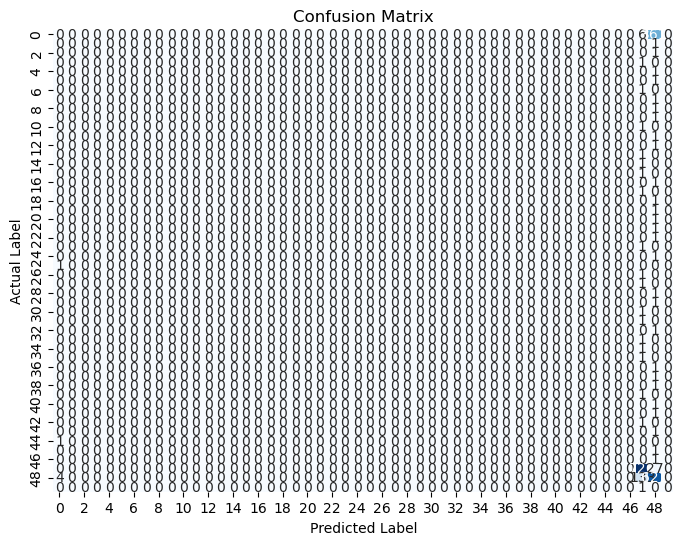

In [19]:
#A5
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt 



# Splitting the data into training and testing sets
x = dt['news']
y = dt['label']
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, random_state=50)

# Vectorizing the text data using CountVectorizer
vectorize = CountVectorizer()
x_train_vect = vectorize.fit_transform(train_x)
x_test_vect = vectorize.transform(test_x)

# Training the Multinomial Naive Bayes classifier
classifier_NB = MultinomialNB()
classifier_NB.fit(x_train_vect, train_y)

# Making predictions on the test set
y_pred = classifier_NB.predict(x_test_vect)

# Print the classification for each news article
for i in range(len(test_x)):
    print(f"News Article {i + 1}:")
    print(f"Actual Label: {test_y.iloc[i]}, Predicted Label: {y_pred[i]}")
    print(f"Classification: {'fake' if y_pred[i] == 1 else 'not fake'}")
    print(f"News Text: {test_x.iloc[i]}\n")

# Evaluating the model
accuracy = accuracy_score(test_y, y_pred)
clf_report = classification_report(test_y, y_pred)
Confusion_matrix = confusion_matrix(test_y, y_pred)

# Printing the overall results
print("Accuracy obtained is ", accuracy)
print("\nClassification report:\n", clf_report)
print("\nConfusion matrix:\n", Confusion_matrix)

# Plotting a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(Confusion_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()
